In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
data  = pd.read_csv("C:\dataset\Algerian_forest_fires_cleaned_dataset.csv")

In [4]:
print(f'Dataset contains {data.shape[0]} rows and {data.shape[1]} columns')

Dataset contains 243 rows and 15 columns


In [5]:
print(data.head())

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  


In [6]:
print(data.tail())


     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI       Classes  Region  
238  6.5       fire          1  
239  0.0   not fire          1  
240  0.2   not fire          1  
241  0.7   not fire          1  
242  0.5  not fire           1  


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB
None


In [8]:
print(data.describe())

              day       month    year  Temperature          RH          Ws  \
count  243.000000  243.000000   243.0   243.000000  243.000000  243.000000   
mean    15.761317    7.502058  2012.0    32.152263   62.041152   15.493827   
std      8.842552    1.114793     0.0     3.628039   14.828160    2.811385   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.500000   14.000000   
50%     16.000000    8.000000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.500000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean     0.762963   77.842387   14.680658   49.430864    4.742387   16.690535   
std      2.003207   14.349641   12.393040   47.665606 

In [9]:
print(f'Missing values before handling: \n{data.isnull().sum()}')

Missing values before handling: 
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [10]:
data.dropna(inplace=True)
print(f'Missing values after handling: {data.isnull().sum()}')

Missing values after handling: day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [11]:
data['Classes'] = data['Classes'].apply(lambda x: 1 if x.strip() == 'fire' else 0)
data['Region'] = data['Region'].astype(int) 

In [12]:
scaler = StandardScaler()
numerical_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [13]:
X = data.drop(['Classes', 'day', 'month', 'year'], axis=1)  # Features (excluding date columns)
y = data['Classes']  # Target variable

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


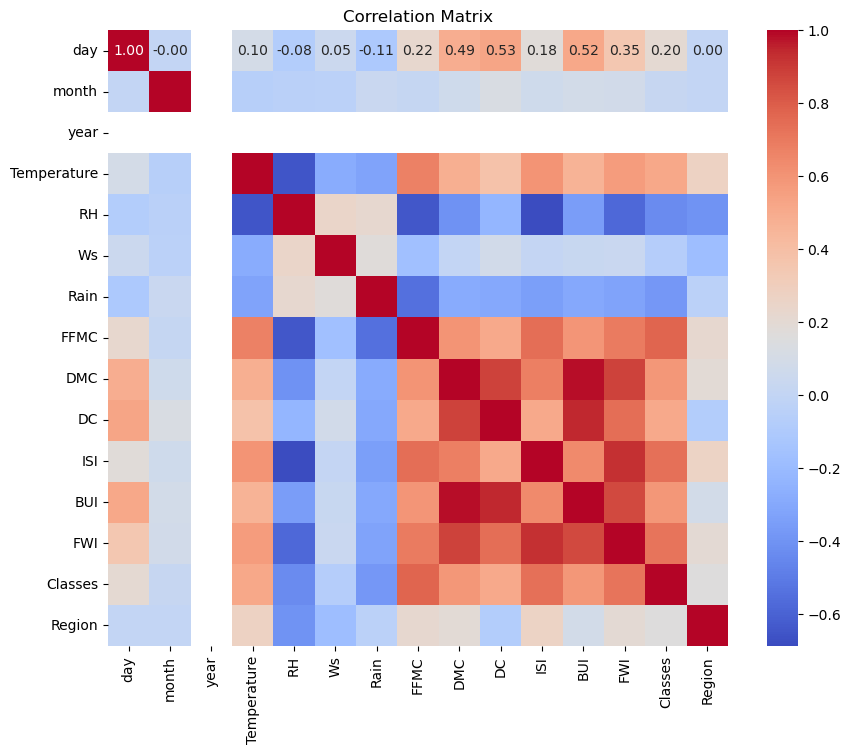

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

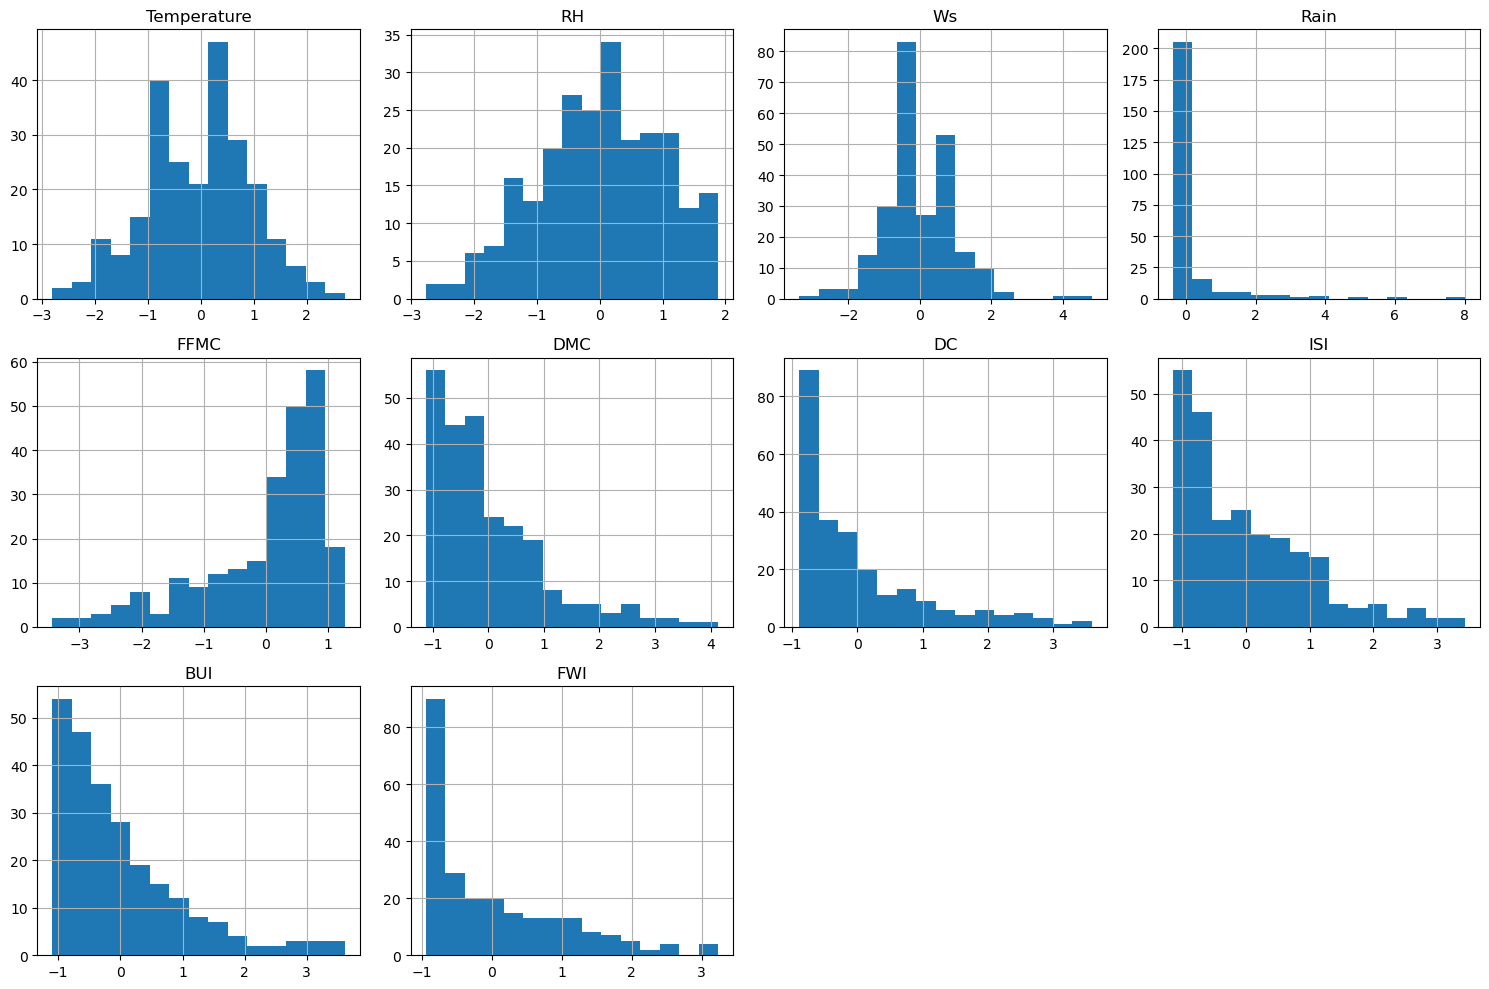

In [16]:
data[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.tight_layout()
plt.show()

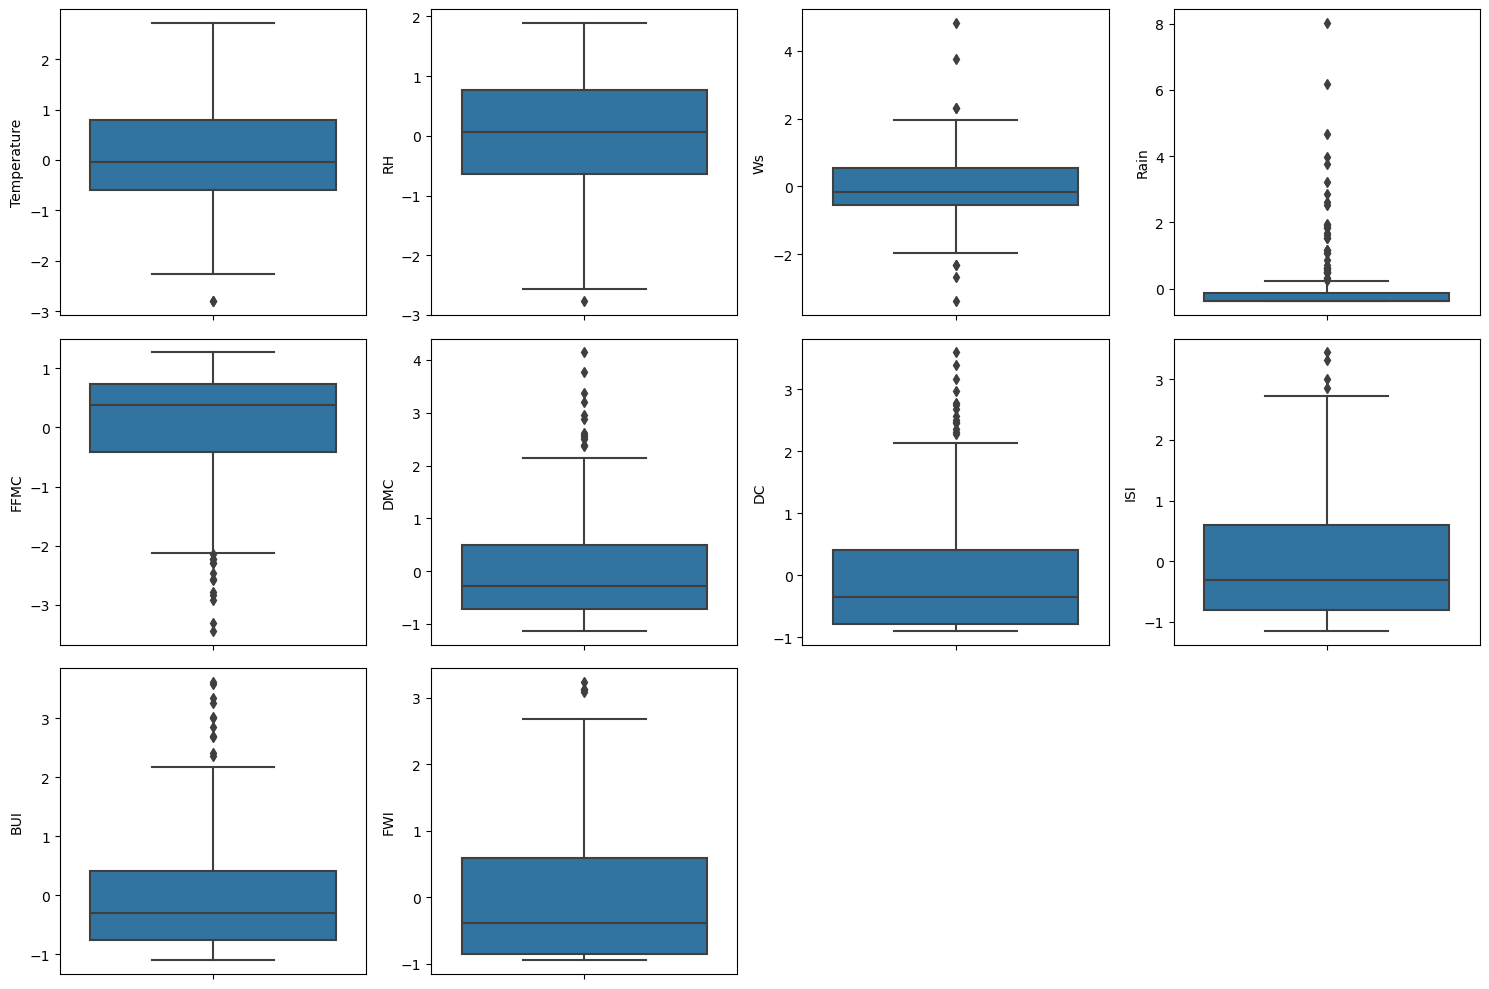

In [17]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=data, y=feature)
plt.tight_layout()
plt.show()


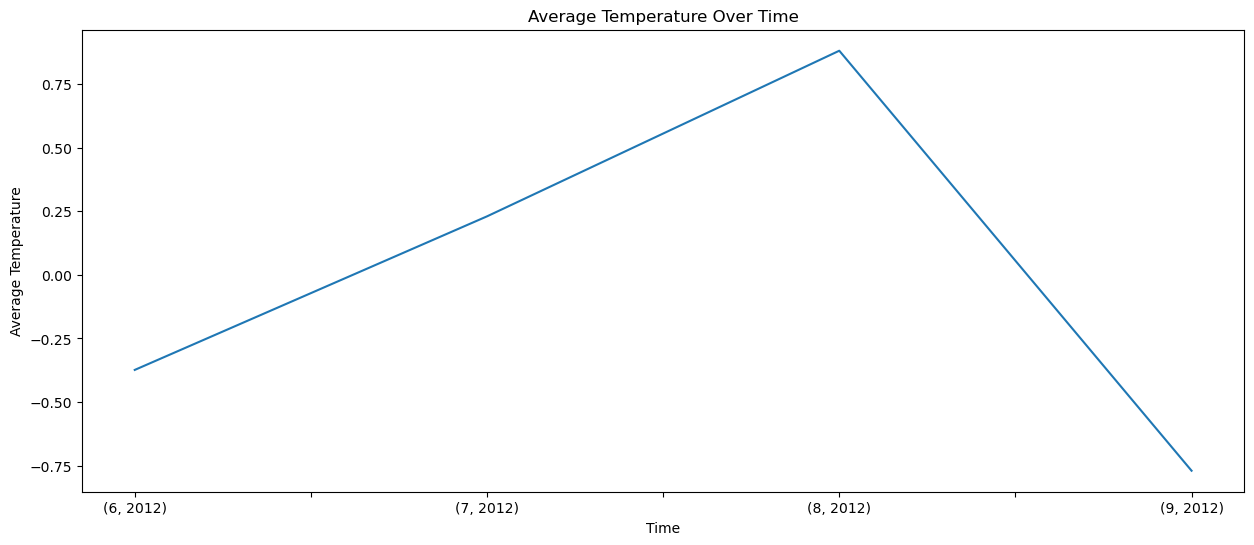

In [18]:
plt.figure(figsize=(15, 6))
data.groupby(['month', 'year']).mean()['Temperature'].plot()
plt.title('Average Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Average Temperature')
plt.show()


C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

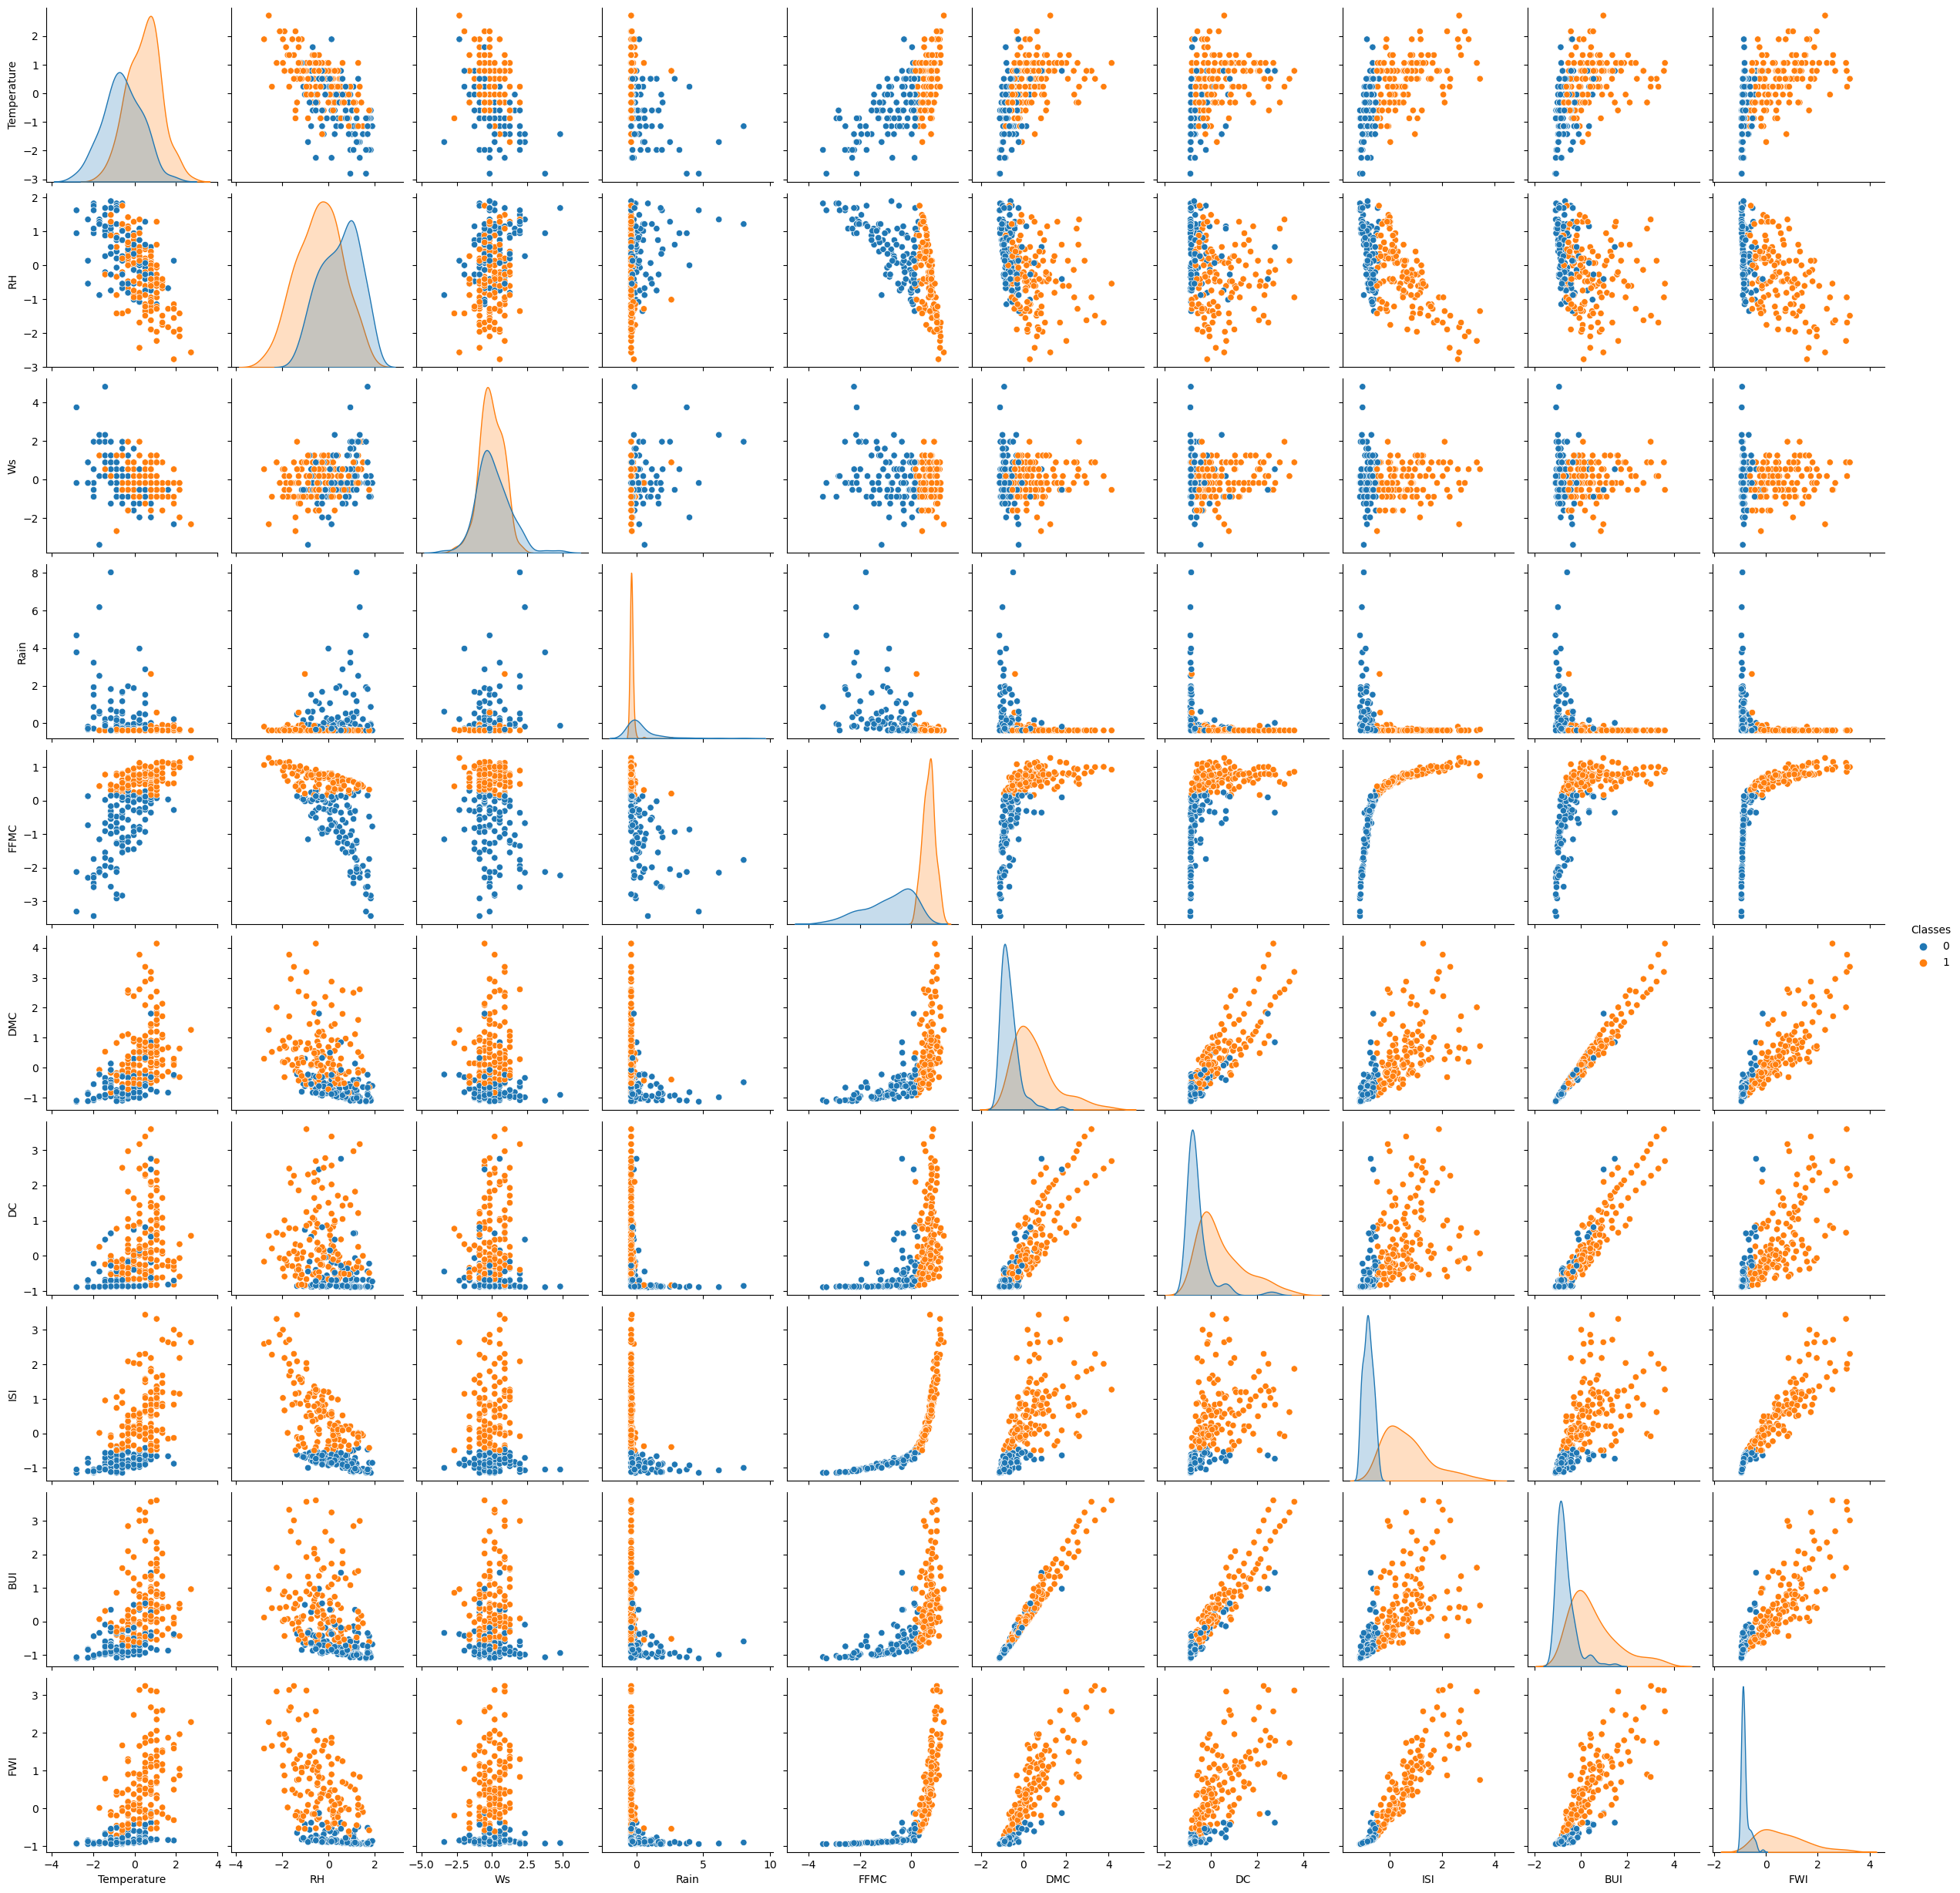

In [19]:
sns.pairplot(data[numerical_features + ['Classes']], hue='Classes')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

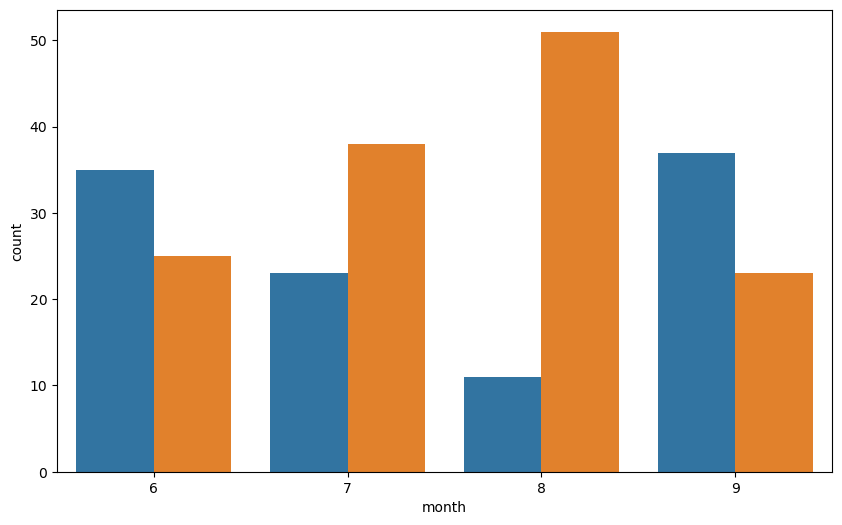

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='month', hue='Classes')
plt.title('Frequency of Fire Occurrences by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

In [21]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('Matthews Correlation Coefficient:', matthews_corrcoef(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.98      0.99        44

    accuracy                           0.99        73
   macro avg       0.98      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73

ROC AUC Score: 0.9886363636363636
Matthews Correlation Coefficient: 0.9719552302945694


In [23]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


In [24]:
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))
print('Best ROC AUC Score:', roc_auc_score(y_test, y_pred_best))
print('Best Matthews Correlation Coefficient:', matthews_corrcoef(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.98      0.99        44

    accuracy                           0.99        73
   macro avg       0.98      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73

Best ROC AUC Score: 0.9886363636363636
Best Matthews Correlation Coefficient: 0.9719552302945694


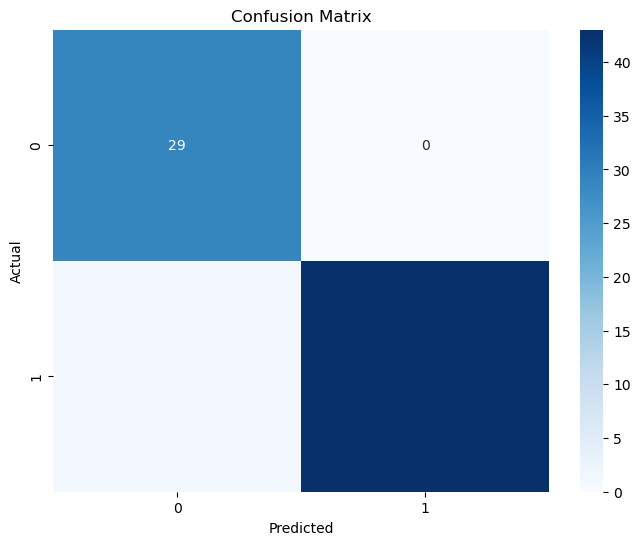

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

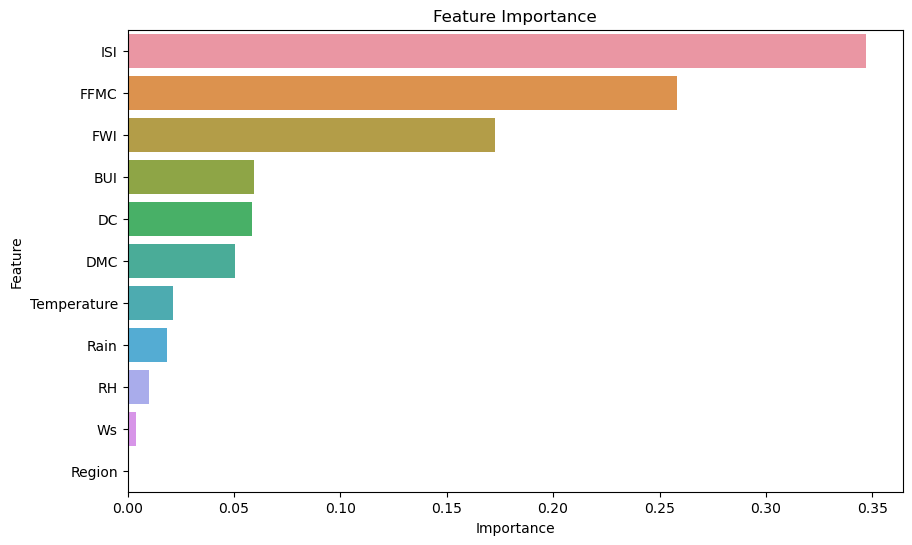

In [26]:
feature_importance = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()